<a href="https://colab.research.google.com/github/ariqnfl/IYKRA-DF6/blob/main/Proficiency_Test___Muhammad_Ariq_Naufal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load dataset

In [2]:
# load dataset
df_1 = pd.read_csv('Crime2018.csv')
df_2 = pd.read_csv('Crime2019.csv')
df_3 = pd.read_csv('Crime2020.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_1.head()

INCIDENT_NUMBER  OFFENSE_CODE  ...       Long                     Location
0      I192077559          3115  ... -71.095534  (42.27997063, -71.09553354)
1      I192077332           619  ... -71.120853  (42.26922388, -71.12085347)
2      I192076660          2629  ... -71.130211  (42.29076521, -71.13021098)
3      I192075386          2629  ... -71.050988  (42.35526402, -71.05098788)
4      I192075335          3208  ... -71.072838  (42.35352153, -71.07283786)

[5 rows x 17 columns]

change shooting variable

In [4]:
df_1['SHOOTING'] = df_1['SHOOTING'].apply(lambda x: 1 if x == 'Y' else 0)

In [5]:
df_2.head()

INCIDENT_NUMBER  ...                               Location
0       950485010  ...   (42.2848257658049, -71.091373689388)
1       212025249  ...                                 (0, 0)
2       212022744  ...  (42.2975553295965, -71.0597091024257)
3       202007387  ...    (42.3721588029014, -71.03852378203)
4       212016533  ...  (42.2975553295965, -71.0597091024257)

[5 rows x 17 columns]

In [6]:
df_3.head()

INCIDENT_NUMBER  ...                               Location
0       854652314  ...  (42.3336792181085, -71.0918775461846)
1       457856954  ...  (42.3336792181085, -71.0918775461846)
2       302030654  ...  (42.3395419898301, -71.0694087696754)
3       212025777  ...  (42.3708180467024, -71.0392907813515)
4       212025557  ...  (42.3618385665647, -71.0597648909416)

[5 rows x 17 columns]

## concat all data

In [7]:
# concat dataset
data = pd.concat([df_1,df_2,df_3])

In [8]:
df = data.copy()

In [9]:
df.head()

INCIDENT_NUMBER  OFFENSE_CODE  ...       Long                     Location
0      I192077559          3115  ... -71.095534  (42.27997063, -71.09553354)
1      I192077332           619  ... -71.120853  (42.26922388, -71.12085347)
2      I192076660          2629  ... -71.130211  (42.29076521, -71.13021098)
3      I192075386          2629  ... -71.050988  (42.35526402, -71.05098788)
4      I192075335          3208  ... -71.072838  (42.35352153, -71.07283786)

[5 rows x 17 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189564 entries, 0 to 70893
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      189564 non-null  object 
 1   OFFENSE_CODE         189564 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null   object 
 3   OFFENSE_DESCRIPTION  189564 non-null  object 
 4   DISTRICT             188527 non-null  object 
 5   REPORTING_AREA       189564 non-null  object 
 6   SHOOTING             189564 non-null  int64  
 7   OCCURRED_ON_DATE     189564 non-null  object 
 8   YEAR                 189564 non-null  int64  
 9   MONTH                189564 non-null  int64  
 10  DAY_OF_WEEK          189564 non-null  object 
 11  HOUR                 189564 non-null  int64  
 12  UCR_PART             98868 non-null   object 
 13  STREET               187948 non-null  object 
 14  Lat                  183135 non-null  float64
 15  Long              

In [11]:
df.describe(include='object')
# Reporting Area have blank top

INCIDENT_NUMBER  ...                  Location
count           189564  ...                    189564
unique          177410  ...                     26568
top         I182051210  ...  (0.00000000, 0.00000000)
freq                14  ...                      6429

[4 rows x 10 columns]

In [12]:
df.describe()

OFFENSE_CODE       SHOOTING  ...            Lat          Long
count  189564.000000  189564.000000  ...  183135.000000  1.831350e+05
mean     2330.227607       0.009073  ...      41.759070 -7.014292e+01
std      1212.336767       0.094822  ...       4.856312  8.115174e+00
min       111.000000       0.000000  ...      -1.000000 -7.117867e+01
25%      1102.000000       0.000000  ...      42.296042 -7.109780e+01
50%      3005.000000       0.000000  ...      42.325559 -7.107732e+01
75%      3201.000000       0.000000  ...      42.348132 -7.106134e+01
max     99999.000000       1.000000  ...      42.395042  5.249691e-08

[8 rows x 7 columns]

In [13]:
df.shape

(189564, 17)

check null data

In [14]:
df.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     90676
OFFENSE_DESCRIPTION        0
DISTRICT                1037
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               90696
STREET                  1616
Lat                     6429
Long                    6429
Location                   0
dtype: int64

## check offense code group with null data

In [15]:
df[df['OFFENSE_CODE_GROUP'].isna()].head()

INCIDENT_NUMBER  ...                               Location
0       950485010  ...   (42.2848257658049, -71.091373689388)
1       212025249  ...                                 (0, 0)
2       212022744  ...  (42.2975553295965, -71.0597091024257)
3       202007387  ...    (42.3721588029014, -71.03852378203)
4       212016533  ...  (42.2975553295965, -71.0597091024257)

[5 rows x 17 columns]

In [16]:
df[df['INCIDENT_NUMBER']=='212025249']

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  ...  Lat Long Location
1       212025249          1107                NaN  ...  0.0  0.0   (0, 0)

[1 rows x 17 columns]

fill null code group with offense description first word

In [17]:
df['OFFENSE_CODE_GROUP'] = df['OFFENSE_CODE_GROUP'].fillna(df['OFFENSE_DESCRIPTION'].str.split().str.get(0))

In [18]:
df[df['INCIDENT_NUMBER']=='212025249']

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  ...  Lat Long Location
1       212025249          1107              FRAUD  ...  0.0  0.0   (0, 0)

[1 rows x 17 columns]

In [19]:
df.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1037
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               90696
STREET                  1616
Lat                     6429
Long                    6429
Location                   0
dtype: int64

In [20]:
df['OFFENSE_CODE_GROUP'].value_counts()

LARCENY                            12013
Motor Vehicle Accident Response    11647
M/V                                11435
INVESTIGATE                        10478
Medical Assistance                  8257
                                   ...  
TRUANCY                                6
POSSESSION                             5
HUMAN TRAFFICKING                      1
Evidence                               1
Justifiable                            1
Name: OFFENSE_CODE_GROUP, Length: 133, dtype: int64

convert all to upper

In [21]:
df['OFFENSE_CODE_GROUP'] = df['OFFENSE_CODE_GROUP'].apply(lambda x: x.upper())

In [22]:
df['OFFENSE_CODE_GROUP'].value_counts()

LARCENY                            20129
MOTOR VEHICLE ACCIDENT RESPONSE    11647
M/V                                11435
INVESTIGATE                        10478
VANDALISM                           8307
                                   ...  
OBSCENE                                6
POSSESSION                             5
HUMAN TRAFFICKING                      1
JUSTIFIABLE                            1
EVIDENCE                               1
Name: OFFENSE_CODE_GROUP, Length: 120, dtype: int64

In [23]:
# check what is M/V
df[df['OFFENSE_CODE_GROUP'] == 'M/V'].head()

INCIDENT_NUMBER  ...                               Location
55        202044940  ...  (42.3490560003051, -71.1504984997502)
56        202044024  ...  (42.3296610191175, -71.0974750332152)
67        202035570  ...  (42.2870935525911, -71.1482212837716)
75        202031863  ...  (42.3395419898301, -71.0694087696754)
113       202018163  ...  (42.2870935525911, -71.1482212837716)

[5 rows x 17 columns]

From dataset M/V is MOTOR VEHICLE ACCIDENT RESPONSE

In [24]:
df['OFFENSE_CODE_GROUP'] = df['OFFENSE_CODE_GROUP'].replace({'M/V' : 'MOTOR VEHICLE ACCIDENT RESPONSE'})

In [25]:
df['OFFENSE_CODE_GROUP'].value_counts()

MOTOR VEHICLE ACCIDENT RESPONSE    23082
LARCENY                            20129
INVESTIGATE                        10478
VANDALISM                           8307
MEDICAL ASSISTANCE                  8257
                                   ...  
OBSCENE                                6
POSSESSION                             5
EVIDENCE                               1
JUSTIFIABLE                            1
HUMAN TRAFFICKING                      1
Name: OFFENSE_CODE_GROUP, Length: 119, dtype: int64

## check reporting area with blank data

In [26]:
df[df['REPORTING_AREA'] == ' '].head()

INCIDENT_NUMBER  OFFENSE_CODE  ... Long                    Location
49       I192057266          1107  ... -1.0  (-1.00000000, -1.00000000)
124      I192033783           619  ...  NaN    (0.00000000, 0.00000000)
125      I192033774          3201  ...  NaN    (0.00000000, 0.00000000)
179      I192024207           619  ...  NaN    (0.00000000, 0.00000000)
199      I192021161          3114  ...  NaN    (0.00000000, 0.00000000)

[5 rows x 17 columns]

In [27]:
df['REPORTING_AREA'].value_counts()

       18176
355     3653
465     3098
167     2888
282     2837
       ...  
000        2
659        2
666        1
218        1
190        1
Name: REPORTING_AREA, Length: 880, dtype: int64

In [28]:
# check for new reporting area to assigned with blank reporting area
df[df['REPORTING_AREA'] == '999'].head()

Empty DataFrame
Columns: [INCIDENT_NUMBER, OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA, SHOOTING, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, UCR_PART, STREET, Lat, Long, Location]
Index: []

replace blank reporting area with 999

In [29]:
df['REPORTING_AREA'] = df['REPORTING_AREA'].replace({' ' : '999'})

check data

In [30]:
df.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1037
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               90696
STREET                  1616
Lat                     6429
Long                    6429
Location                   0
dtype: int64

## check lat long with null data

In [31]:
df[df['Lat'].isna()].head()

INCIDENT_NUMBER  OFFENSE_CODE  ... Long                  Location
68       I192050127          1107  ...  NaN  (0.00000000, 0.00000000)
93       I192042185          1102  ...  NaN  (0.00000000, 0.00000000)
124      I192033783           619  ...  NaN  (0.00000000, 0.00000000)
125      I192033774          3201  ...  NaN  (0.00000000, 0.00000000)
179      I192024207           619  ...  NaN  (0.00000000, 0.00000000)

[5 rows x 17 columns]

In [32]:
df[df['Long'].isna()].head()

INCIDENT_NUMBER  OFFENSE_CODE  ... Long                  Location
68       I192050127          1107  ...  NaN  (0.00000000, 0.00000000)
93       I192042185          1102  ...  NaN  (0.00000000, 0.00000000)
124      I192033783           619  ...  NaN  (0.00000000, 0.00000000)
125      I192033774          3201  ...  NaN  (0.00000000, 0.00000000)
179      I192024207           619  ...  NaN  (0.00000000, 0.00000000)

[5 rows x 17 columns]

Replace lat, long null values data with 0

In [33]:
df['Lat'] = df['Lat'].fillna(0)

In [34]:
df['Long'] = df['Long'].fillna(0)

In [35]:
df.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1037
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               90696
STREET                  1616
Lat                        0
Long                       0
Location                   0
dtype: int64

## Change datetime format for OCCURRED ON DATE

In [36]:
# change to datetime format
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

## Replace all null categorical with their mode

In [37]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [38]:
df.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [39]:
df.head()

INCIDENT_NUMBER  OFFENSE_CODE  ...       Long                     Location
0      I192077559          3115  ... -71.095534  (42.27997063, -71.09553354)
1      I192077332           619  ... -71.120853  (42.26922388, -71.12085347)
2      I192076660          2629  ... -71.130211  (42.29076521, -71.13021098)
3      I192075386          2629  ... -71.050988  (42.35526402, -71.05098788)
4      I192075335          3208  ... -71.072838  (42.35352153, -71.07283786)

[5 rows x 17 columns]

## Extract District Data

In [40]:
df['DISTRICT_NUMBER'] = df['DISTRICT'].str.extract('([0-9]+)')
df['DISTRICT_CODE'] = df['DISTRICT'].str.extract('([A-z]+)')

In [41]:
df.head()

INCIDENT_NUMBER  OFFENSE_CODE  ... DISTRICT_NUMBER DISTRICT_CODE
0      I192077559          3115  ...               3             B
1      I192077332           619  ...              18             E
2      I192076660          2629  ...               5             E
3      I192075386          2629  ...               1             A
4      I192075335          3208  ...               4             D

[5 rows x 19 columns]

In [42]:
df.isnull().sum()

INCIDENT_NUMBER          0
OFFENSE_CODE             0
OFFENSE_CODE_GROUP       0
OFFENSE_DESCRIPTION      0
DISTRICT                 0
REPORTING_AREA           0
SHOOTING                 0
OCCURRED_ON_DATE         0
YEAR                     0
MONTH                    0
DAY_OF_WEEK              0
HOUR                     0
UCR_PART                 0
STREET                   0
Lat                      0
Long                     0
Location                 0
DISTRICT_NUMBER        320
DISTRICT_CODE            0
dtype: int64

In [43]:
df['DISTRICT_CODE'].value_counts()

B           51448
C           38736
D           36551
A           32281
E           30228
External      320
Name: DISTRICT_CODE, dtype: int64

In [44]:
df[df['DISTRICT_NUMBER'].isna()].head()

INCIDENT_NUMBER  OFFENSE_CODE  ... DISTRICT_NUMBER DISTRICT_CODE
5          212010434           735  ...             NaN      External
143        202014294          1107  ...             NaN      External
953        192104556           706  ...             NaN      External
1973       192103106          3207  ...             NaN      External
2404       192102533          3001  ...             NaN      External

[5 rows x 19 columns]

In [45]:
df['DISTRICT_NUMBER'].value_counts()

2     29971
11    24345
4     24312
3     21477
1     20467
6     14391
14    12239
18    10875
13    10714
5      8639
7      7703
15     4111
Name: DISTRICT_NUMBER, dtype: int64

Because its a External District, and there are no 0 district number so i will fill it with 0

In [46]:
df['DISTRICT_NUMBER'] = df['DISTRICT_NUMBER'].fillna('0')

In [47]:
df['DISTRICT_NUMBER'].value_counts()

2     29971
11    24345
4     24312
3     21477
1     20467
6     14391
14    12239
18    10875
13    10714
5      8639
7      7703
15     4111
0       320
Name: DISTRICT_NUMBER, dtype: int64

Check all data

In [48]:
df.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
DISTRICT_NUMBER        0
DISTRICT_CODE          0
dtype: int64

## Convert and Save to CSV

In [49]:
df.to_csv('crime_dataset.csv',index=False)

In [50]:
len(df)

189564

# Insights

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

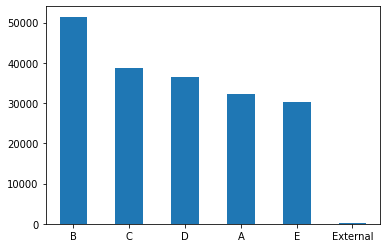

In [51]:
df['DISTRICT_CODE'].value_counts().nlargest(6).plot(kind='bar')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

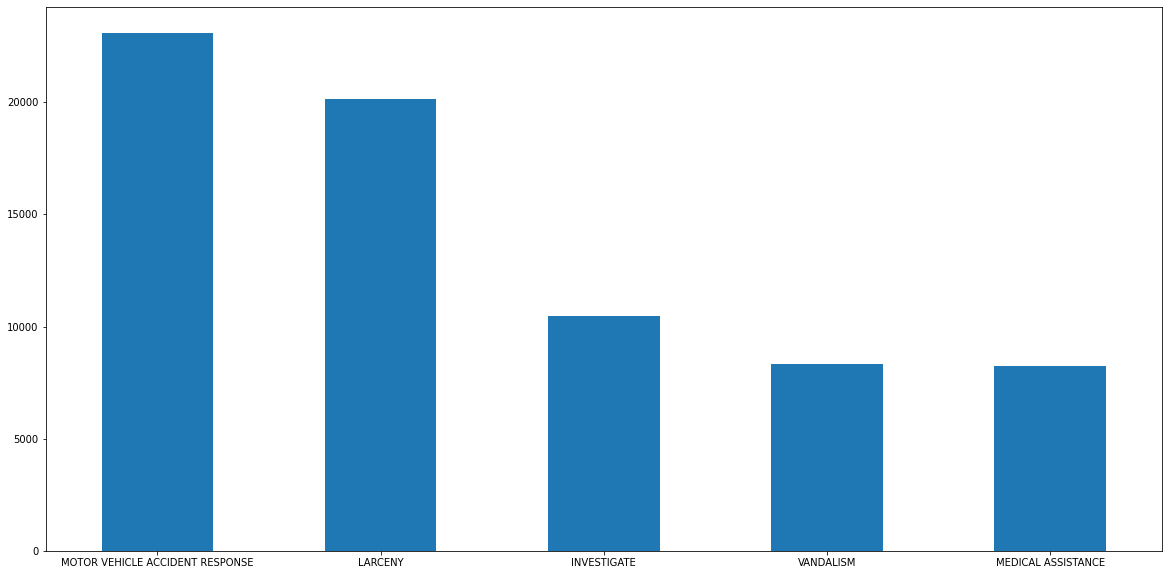

In [52]:
plt.figure(figsize=(20,10))
df['OFFENSE_CODE_GROUP'].value_counts().nlargest(5).plot(kind='bar')
plt.xticks(rotation=0)

In [53]:
import folium
from folium.plugins import HeatMap

In [54]:
# Create basic Folium crime map
crime_map = folium.Map(location=[42.36,-71.07], 
                      zoom_start = 11.5,min_zoom = 11.5)

# Add data for heatmp 
data_heatmap = df[df.YEAR == 2018]
data_heatmap = df[['Lat','Long']]
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot
crime_map

In [55]:
# Robbery
crime_map = folium.Map(location=[42.32,-71.07], 
                      zoom_start = 11.5,min_zoom = 11.5)

# Add data for heatmp 
data_heatmap = df
data_heatmap = df[['Lat','Long']]
data_heatmap = df[df['OFFENSE_CODE'].isin([301,311,351,361,371,381])]

data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot
crime_map

In [56]:
!pip install geopandas
import geopandas as gpd

In [57]:
gdf = gpd.read_file('Police_Districts.shp')

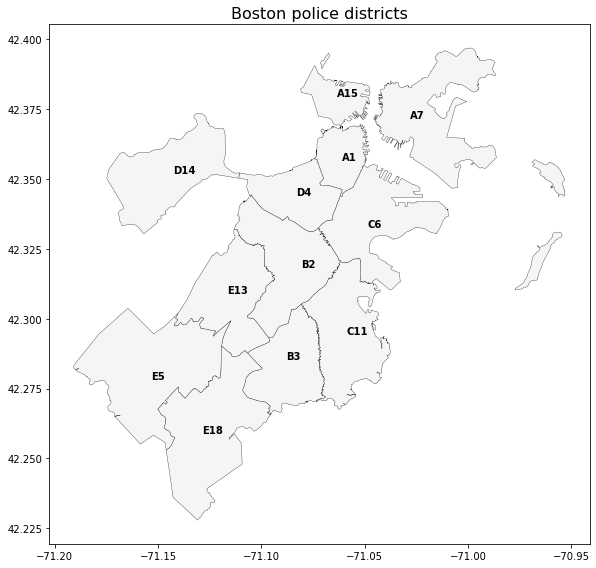

In [58]:
gdf['point'] = gdf.representative_point()

label_points = gdf.copy()
label_points.set_geometry('point', inplace = True)

ax = gdf.plot(color = 'whitesmoke', figsize = (12,8), edgecolor = 'black', linewidth = 0.3)

def add_label():
    for x, y, label in zip(label_points.geometry.x, label_points.geometry.y, label_points['DISTRICT']):
        plt.text(x, y, label, fontsize = 10, fontweight = 'bold')

add_label()
plt.title('Boston police districts', fontsize = 16)
plt.tight_layout()

In [59]:
districts = pd.DataFrame({'Count': df.DISTRICT.value_counts().sort_values(ascending = False)})

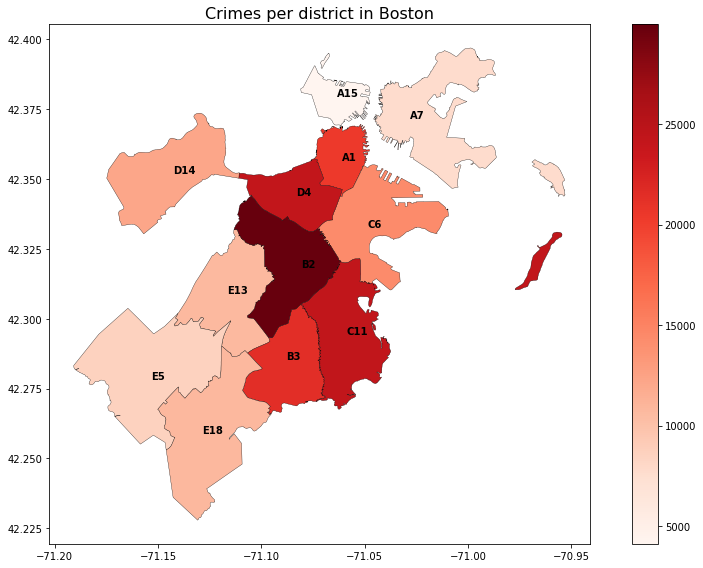

In [60]:
gdf['crimes'] = gdf.DISTRICT.map(districts['Count'])
ax = gdf.plot(column = gdf.crimes, cmap = 'Reds', legend = True, edgecolor = 'black', linewidth = 0.3, figsize = (12,8))
add_label()
plt.title('Crimes per district in Boston', fontsize = 16)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hourly Crime')

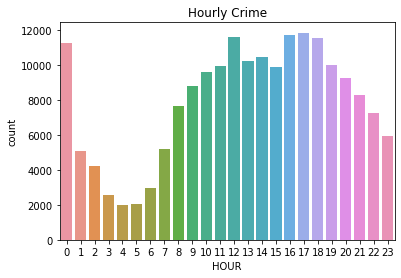

In [62]:
sns.countplot(df['HOUR'])
plt.title("Hourly Crime")

# Python Case

## Soal 1

In [63]:
df['DISTRICT_CODE'].value_counts().nlargest(6)

B           51448
C           38736
D           36551
A           32281
E           30228
External      320
Name: DISTRICT_CODE, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

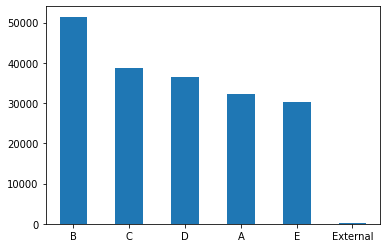

In [64]:
df['DISTRICT_CODE'].value_counts().nlargest(6).plot(kind='bar')
plt.xticks(rotation=0)

## Soal 2

In [65]:
df_2019 = df[df['YEAR'] == 2019]['OFFENSE_CODE_GROUP'].drop_duplicates().to_list()
df_2020 = df[df['YEAR'] == 2020]
df_2020 = df_2020['OFFENSE_CODE_GROUP'].drop_duplicates()
df_2020[~df_2020.isin(df_2019)]

2875         TRUANCY
6228      EXPLOSIVES
6643         OBSCENE
27121       EVIDENCE
61185    JUSTIFIABLE
Name: OFFENSE_CODE_GROUP, dtype: object

## Soal 3

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

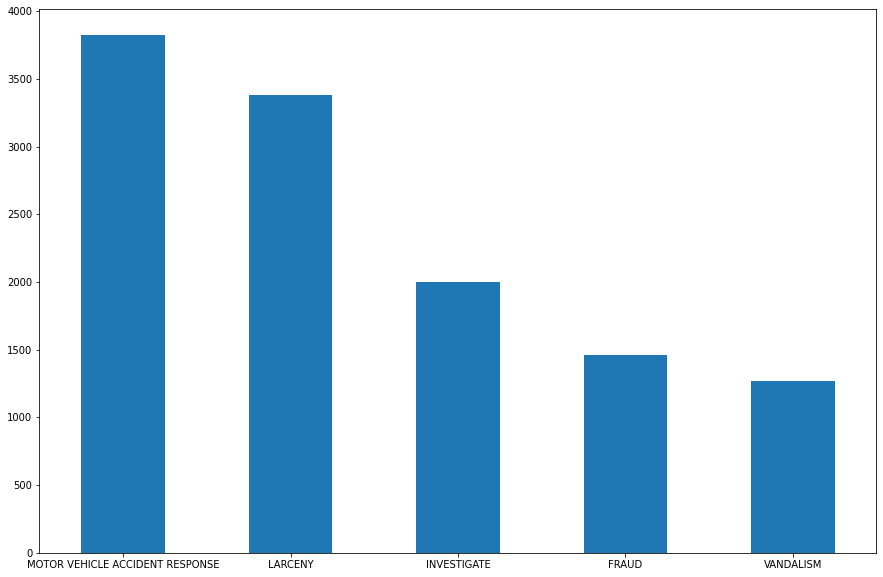

In [66]:
# change to datetime format
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])
# get week number
df['week_number'] = df['OCCURRED_ON_DATE'].dt.isocalendar().week
# filter between 40-45
df_weeknumber = df[df['week_number'].between(40,45)]
plt.figure(figsize=(15,10))
df_weeknumber['OFFENSE_CODE_GROUP'].value_counts().nlargest(5).plot(kind='bar')
plt.xticks(rotation=0)

## Soal 4

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

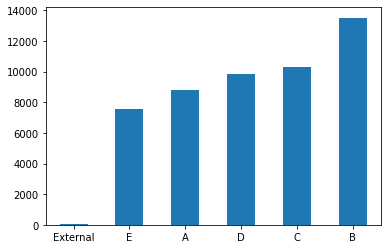

In [67]:
# filter day of week isin sunday & saturday
df_weekend = df[df['DAY_OF_WEEK'].isin(['Sunday','Saturday'])]
# get smallest value
df_weekend['DISTRICT_CODE'].value_counts().nsmallest(6).plot(kind='bar')
plt.xticks(rotation=0)

## Soal 5

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

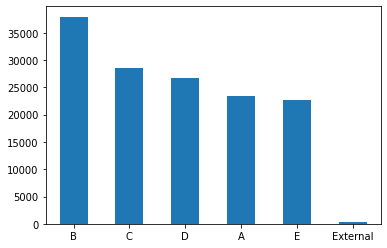

In [68]:
# filter day of week isin weekday
df_weekday = df[df['DAY_OF_WEEK'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]
# get smallest value
df_weekday['DISTRICT_CODE'].value_counts().nlargest(6).plot(kind='bar')
plt.xticks(rotation=0)

# ML

In [69]:
def plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

In [70]:
df_ml = df.copy()

In [71]:
df_ml.head()

INCIDENT_NUMBER  OFFENSE_CODE  ... DISTRICT_CODE week_number
0      I192077559          3115  ...             B          18
1      I192077332           619  ...             E          10
2      I192076660          2629  ...             E          44
3      I192075386          2629  ...             A          15
4      I192075335          3208  ...             D           1

[5 rows x 20 columns]

Filter only `'OFFENSE_CODE_GROUP','DISTRICT','YEAR','MONTH','HOUR'`

In [72]:
df_ml = df_ml[['OFFENSE_CODE_GROUP','DISTRICT','YEAR','MONTH','DAY_OF_WEEK','HOUR']]
df_ml.head()

OFFENSE_CODE_GROUP DISTRICT  YEAR  MONTH DAY_OF_WEEK  HOUR
0  INVESTIGATE PERSON       B3  2018      4      Monday     9
1             LARCENY      E18  2018      3     Tuesday     8
2          HARASSMENT       E5  2018     10   Wednesday    12
3          HARASSMENT       A1  2018      4      Monday     8
4       PROPERTY LOST       D4  2018      1      Monday     0

In [73]:
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


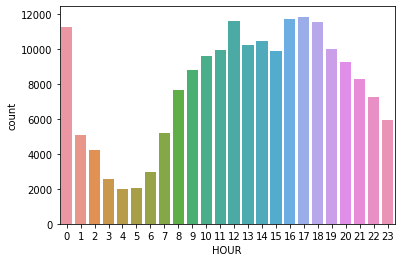

In [74]:
# check dataset balance
sns.countplot(df_ml['HOUR'])

In [75]:
le = LabelEncoder()
# mengeluarkan kolom HOUR
df_encode = df_ml.drop(columns=['HOUR'])

In [76]:
# using label encoder 
df_encode['DISTRICT'] = le.fit_transform(df_encode['DISTRICT'])
df_encode['OFFENSE_CODE_GROUP'] = le.fit_transform(df_encode['OFFENSE_CODE_GROUP'])
df_encode['DAY_OF_WEEK'] = le.fit_transform(df_encode['DAY_OF_WEEK'])

In [77]:
df_encode.head()

OFFENSE_CODE_GROUP  DISTRICT  YEAR  MONTH  DAY_OF_WEEK
0                  52         4  2018      4            1
1                  58        10  2018      3            5
2                  42        11  2018     10            6
3                  42         0  2018      4            1
4                  87         8  2018      1            1

In [84]:
df['OFFENSE_CODE_GROUP'].value_counts()

MOTOR VEHICLE ACCIDENT RESPONSE    23082
LARCENY                            20129
INVESTIGATE                        10478
VANDALISM                           8307
MEDICAL ASSISTANCE                  8257
                                   ...  
OBSCENE                                6
POSSESSION                             5
EVIDENCE                               1
JUSTIFIABLE                            1
HUMAN TRAFFICKING                      1
Name: OFFENSE_CODE_GROUP, Length: 119, dtype: int64

In [78]:
df_encode['OFFENSE_CODE_GROUP'].value_counts()

71     23082
58     20129
51     10478
110     8307
66      8257
       ...  
74         6
82         5
48         1
54         1
30         1
Name: OFFENSE_CODE_GROUP, Length: 119, dtype: int64

In [83]:
df['DISTRICT'].value_counts()

B2          29971
C11         24345
D4          24312
B3          21477
A1          20467
C6          14391
D14         12239
E18         10875
E13         10714
E5           8639
A7           7703
A15          4111
External      320
Name: DISTRICT, dtype: int64

In [79]:
df_encode['DISTRICT'].value_counts()

3     29971
5     24345
8     24312
4     21477
0     20467
6     14391
7     12239
10    10875
9     10714
11     8639
2      7703
1      4111
12      320
Name: DISTRICT, dtype: int64

In [80]:
df['DAY_OF_WEEK'].value_counts()

Friday       28689
Wednesday    27951
Thursday     27724
Monday       27676
Tuesday      27428
Saturday     26251
Sunday       23845
Name: DAY_OF_WEEK, dtype: int64

In [81]:
df_encode['DAY_OF_WEEK'].value_counts()

0    28689
6    27951
4    27724
1    27676
5    27428
2    26251
3    23845
Name: DAY_OF_WEEK, dtype: int64

In [85]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [86]:
X = df_encode
y = df_ml['HOUR']

# handle imbalance target
oversample = SMOTE()
smote = SMOTE(random_state = 0)
X_smote, y_smote = smote.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


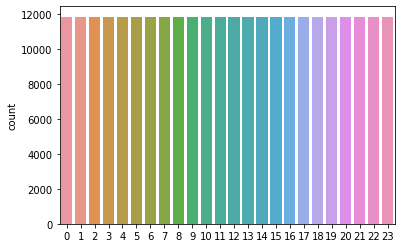

In [87]:
sns.countplot(y_smote)

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report

In [90]:
from sklearn.model_selection import train_test_split
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3,random_state=42)

## basic random forest

In [91]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [92]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.13      0.11      0.12      3547
           1       0.23      0.27      0.25      3502
           2       0.26      0.31      0.29      3640
           3       0.29      0.40      0.34      3506
           4       0.34      0.47      0.39      3504
           5       0.32      0.46      0.37      3578
           6       0.28      0.37      0.32      3576
           7       0.22      0.27      0.24      3553
           8       0.16      0.16      0.16      3605
           9       0.14      0.13      0.14      3577
          10       0.14      0.12      0.13      3627
          11       0.12      0.09      0.11      3670
          12       0.08      0.06      0.07      3546
          13       0.11      0.10      0.10      3502
          14       0.11      0.09      0.10      3580
          15       0.11      0.10      0.11      3534
          16       0.08      0.06      0.07      3540
          17       0.08    

In [93]:
# test on new data
# 110 is OFFENSE_CODE_GROUP for Vandalism
# 7 is DISTRICT for D14 based on label encoder
# 4 is DAY OF WEEK for thursday based on label encoder
s_data = [[110,7,2021,6,4]]

s_data = pd.DataFrame(s_data, columns=['OFFENSE_CODE_GROUP','DISTRICT','YEAR','MONTH','DAY_OF_WEEK'])

In [97]:
# test with random forest
rf_new = rf.predict(s_data)
print("Prediksi Waktu Kejahatan terjadi pada jam %.f" % rf_new)

Prediksi Waktu Kejahatan terjadi pada jam 1
